<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/Handwritten_digits_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEM STATEMENT**
## **The dataset contains 60,000 small square 28*28 pixel grayscale images of handwritten single digits between 0 and 9. We need to classify a given image of a handwritten digit into one of 10 classes**

# **APPROACH**
 * **Importing basic libraries**
 * **Reading the dataset**
 * **Exploratory data Analysis(EDA)**
 * **One hot encoding**
 * **Preprocessing to bring pixels into some range**
 * **Create dense layers ,flatten the images and compile the model**
 * **Train the model with various algorithms**
 * **Evaluating the model using different metrics like accuracy _score and loss value**

 

## **Load the data**

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


## **Print the shape of the data** 

In [ ]:
print('shape of x_train:{}'.format(x_train.shape))
print('shape of x_test:{}'.format(x_test.shape))
print('shape of y_train:{}'.format(y_train.shape))
print('shape of y_test:{}'.format(y_test.shape))

shape of x_train:(60000, 28, 28)
shape of x_test:(10000, 28, 28)
shape of y_train:(60000,)
shape of y_test:(10000,)


## **plot first 30 images**

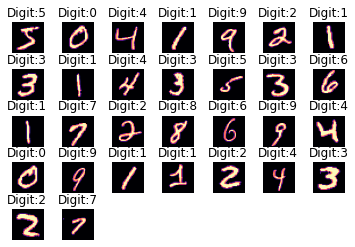

In [ ]:
for i in range(30):
  plt.subplot(5,7,i+1)
  plt.imshow(x_train[i],cmap='magma')
  plt.title("Digit:{}".format(y_train[i]))
  plt.subplots_adjust(hspace=0.5,wspace=0.5,)
  plt.axis('off')

In [ ]:
x_train[0].shape

(28, 28)

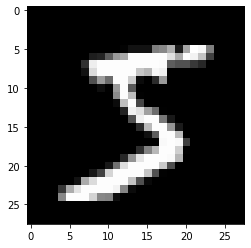

5


In [ ]:
plt.imshow(x_train[0],cmap='gray')
plt.show()
print(y_train[0])

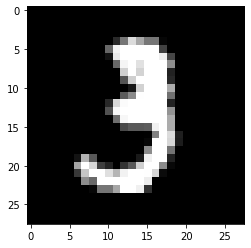

3


In [ ]:
plt.imshow(x_train[10],cmap='gray')
plt.show()
print(y_train[10])

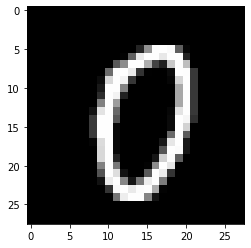

0


In [ ]:
plt.imshow(x_train[1000],cmap='gray')
plt.show()
print(y_train[1000])

## **reshape x_train and x_test**

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
x_train.max()

255

## **preprocessing[bring pixels into same range]**





In [ ]:
x_train=x_train/255
x_test=x_test/255

## **One hot encoding is applied** 

In [ ]:
from keras.utils import to_categorical 
import numpy as np


In [ ]:
y_train.shape


(60000,)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#one hot encoding
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

## **Creating the model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model=Sequential()

## **Create first set of layers**

In [ ]:
## First set of layers

## first convolution layer
model.add(Conv2D(filters=28,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))


### **second set of layers**

In [ ]:
## second convolution layer
model.add(Conv2D(filters=28,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

## **Flatten the images**

In [ ]:
#Flatten images
model.add(Flatten())

#256 neurons in dense hidden layer (you can change this number of neurons)
model.add(Dense(256,activation='relu'))
#last layer in the classifier ,thus 10 possible classes
model.add(Dense(10,activation='softmax'))

## **Compile the model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## **Train the model**

In [ ]:
model.fit(x_train,Y_train,verbose=1,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3068 - accuracy: 0.9082
Epoch 2/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0451 - accuracy: 0.9849
Epoch 3/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0276 - accuracy: 0.9917
Epoch 4/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 5/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 6/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0110 - accuracy: 0.9965
Epoch 7/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 8/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 9/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 10/15
1875/1875 [==============================] - 41s 22m

### **Model summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 700)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               179456    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
model.metrics_names

['loss', 'accuracy']

## **Evaluate the model**

In [ ]:
loss_accuracy=model.evaluate(x_test,Y_test,verbose=0)
print('Test_loss:',loss_accuracy[0])
print('Test Accuracy:',loss_accuracy[1])

Test_loss: 0.04354580491781235
Test Accuracy: 0.991100013256073


In [ ]:
from sklearn.metrics import classification_report
prediction=model.predict_classes(x_test)

In [ ]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
X_test=x_test.reshape(10000,28,28)

Actual digit value:9
Predicted value: 9
correct prediction


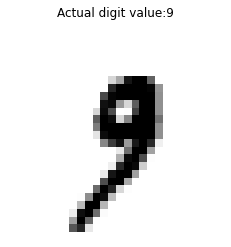

In [ ]:
plt.imshow(X_test[1000],cmap='gray_r')
print('Actual digit value:{}'.format(y_test[1000]))
plt.title('Actual digit value:{}'.format(y_test[1000]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted value:',np.argmax(prediction[1000]))
if(y_test[1000]==(np.argmax(prediction[1000]))):
  print('correct prediction')
else:
    print('wrong prediction')

##**Here we consider new images which is not in the data and lets see whether model can predict the value or not**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 7img.jpg to 7img (1).jpg


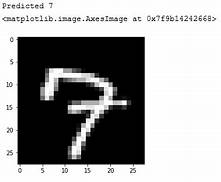

In [ ]:
from IPython.display import Image
Image('7img.jpg',width=100,height=100)

In [ ]:
img=load_img('7img.jpg',grayscale=True,target_size=(28,28))
img=img_to_array(img)
img=img.reshape(1,28,28,1)
img=img/255
digit=model.predict(img)
print('predicted value:',np.argmax(digit))

predicted value: 7


##**In this we passes an image of 7 through the trained model and it has given the perfect prediction as 7**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 2img.jpg to 2img.jpg


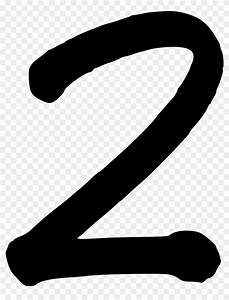

In [ ]:
from IPython.display import Image
Image('2img.jpg',width=100,height=100)

In [ ]:
img=load_img('2img.jpg',grayscale=True,target_size=(28,28))
img=img_to_array(img)
img=img.reshape(1,28,28,1)
img=img/255
digit=model.predict(img)
print('predicted value:',np.argmax(digit))

predicted value: 2


## **Save the model**

In [ ]:
model.save('handwritten.h5')

##**Tried other Algorithms**

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
X_train=x_train.reshape(60000,-1)
X_test=x_test.reshape(10000,-1)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

## **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_predict=model_RF.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))


accuracy score :
 0.969


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DT_predict=model_DT.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))

accuracy score :
 0.8758


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(metric='euclidean')
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
KNN_predict=model_KNN.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))

accuracy score :
 0.9688


## **SVM**

In [ ]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
svm_predict=model_svm.predict(X_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))

accuracy score :
 0.9792


## **Stochastic Gradient Descent**





In [ ]:
from sklearn.linear_model import SGDClassifier
model_sgd=SGDClassifier()
model_sgd.fit(X_train,y_train)
sgd_predict=model_sgd.predict(X_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=sgd_predict))

accuracy score :
 0.8885


In [ ]:
import pandas as pd
scores={'model':['CNN','SVM','Random Forest','KNN','Decision Tree','Sgd'],'Accuarcy scores':[0.9905,0.9792,0.969,0.9688,0.8758,0.8885]}
pd.DataFrame(scores)

,model,Accuarcy scores
0,CNN,0.9905
1,SVM,0.9792
2,Random Forest,0.9690
3,KNN,0.9688
4,Decision Tree,0.8758
5,Sgd,0.8885


**CONCLUSION**

**We tried different algorithms like CNN ,SVM ,Random Forest, KNN, SVM and sgd to classify the handwritten digit images into one of the 10 classes. Among all other algorithms CNN has given the best accuracy of 99% with a minimum loss value i.e  0.06.**